In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
def calc_rg(X):
    rcm=np.array([np.mean(X[:,0]),np.mean(X[:,1]),np.mean(X[:,2])])
    res=0
    N=X.shape[0]
    for ii in range(N): res+=(np.linalg.norm(X[ii,:]-rcm))**2/N
    return np.sqrt(res),rcm

def calc_Rg(X):
    #X=[time, index, dof]
    rcm=np.mean(X, axis=1,keepdims=True)
    rcm_nd=np.tile(rcm,(X.shape[1],1))
    rg=np.sqrt(np.mean(np.linalg.norm(X-rcm_nd,axis=2)**2,axis=1))
    return rg

def gyr_tensor(X):
    rcm=np.mean(X, axis=1,keepdims=True)
    ws=[]
    N=X.shape[1]
    for val in X-rcm:
        S=np.matmul(np.transpose(val),val)/N
        ws.append(np.sort(np.linalg.eig(S)[0]))
    # rcm_nd=np.tile(rcm,(X.shape[1],1))
    # S=np.matmul(np.transpose(X-rcm),X-rcm)
    return np.array(ws)

def Gyration_tensor(pos):
    N=pos.shape[0]
    Rg=calc_rg(pos)[1]
    Rg_mat=np.array([Rg for _ in range(N)])
    A=np.subtract(pos,Rg_mat)
    S=np.matmul(np.transpose(A),A)/N
    w= np.sort(np.linalg.eig(S)[0])
    return w

#         for re_len in [10,20,40]:
#             Nc_re=int(k2-k1-re_len)
#             renrm_chr=np.array([calc_rg(pos[k1+ii:k1+ii+re_len])[1] for ii in range(Nc_re)])
#             Rg_mat_re=np.array([Rg for _ in range(Nc_re)])
#             A_re=np.subtract(renrm_chr,Rg_mat_re)
#             S_re=np.matmul(np.transpose(A_re),A_re)/Nc_re
#             w_re=np.sort(np.linalg.eig(S_re)[0])
#             fout.write('{:8.5f}\t\t{:8.5f}\t\t{:8.5}\t\t'.format(w_re[0],w_re[1],w_re[2]))
#         fout.write('\n')
#     return 0

In [7]:
os.listdir('../../data/trajectory/')

['ani_free_gas.gif',
 'ani_R020.gif',
 'ani_R0300.gif',
 'ani_sticky_gas_T0.1_F0.1_Ta10-R20.gif',
 'ani_sticky_gas_T0.1_F1_Ta10.gif',
 'cndb2ndb.py',
 'ndb2pdb.py',
 'snap800AB.npy',
 'test.npy',
 'test_ani.gif',
 'test_traj_Rouse_chain_T1.0_F0.3_Ta180_Esoft0_R020_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_positions.npy',
 'test_traj_Rouse_chain_T1.0_F0.5_Ta60_Esoft0_R020_Na1200_blocksize100_kb5.0_dt0.001_kr30.0_positions.npy']

In [3]:
traj=np.load('../../data/trajectory/test_traj_Rouse_chain_T1.0_F0.3_Ta180_Esoft0_R020_Na1200_blocksize100_kb10.0_dt0.001_kr30.0_positions.npy')
traj.shape

(5000, 1200, 3)

In [17]:
wvals=gyr_tensor(traj)
wvals.shape



(5000, 3)

In [12]:
for val in traj:
    print(Gyration_tensor(val))


[ 38.19360534  67.35212681 155.59532242]
[ 38.7677434   67.54105779 155.65145719]
[ 39.63098874  67.98153354 155.42285539]
[ 39.7805486   68.22279588 155.41401474]
[ 39.11682048  68.5098013  154.3756806 ]
[ 39.98128347  69.43643551 153.76765072]
[ 39.62951856  68.73302878 154.77909078]
[ 38.9611605  68.6818128 153.5731736]
[ 38.89912601  68.71178447 152.94569242]
[ 38.63650498  69.28840625 152.94034976]
[ 38.38540137  68.32618227 152.00668935]
[ 37.46342863  68.27042026 151.11647365]
[ 37.79172641  69.46886704 151.40990133]
[ 38.11947481  69.53964176 149.82441133]
[ 39.06140174  69.55610852 152.7115428 ]
[ 39.51226825  70.9848113  151.36608706]
[ 39.14549856  70.82865265 150.6267412 ]
[ 38.75088274  71.12781074 151.10436978]
[ 38.84973849  71.35369509 151.38801959]
[ 39.31381667  69.29340574 151.47276652]
[ 39.06773656  70.6339561  150.23625682]
[ 39.20478735  71.60394511 149.97588455]
[ 39.26717664  71.92472999 150.4777504 ]
[ 39.09101023  72.4640615  151.41555995]
[ 39.19142593  73.1

In [54]:
rg=np.mean(np.linalg.norm(traj-cmd,axis=2)**2,axis=1)
rg

array([261.14105457, 261.96025838, 263.03537767, ..., 290.25983258,
       292.61896648, 291.94760626])

In [32]:
rg_val=[]
rcm_val=[]
for val in traj:
    val1=calc_rg(val)
    rg_val.append(val1[0])
    print(val1[1])
print(len(rg_val))

[-4.7128091  -6.32045893 -1.54715679]
[-4.71957459 -6.27269512 -1.50108444]
[-4.69439271 -6.314779   -1.46836259]
[-4.70019691 -6.34385909 -1.4136508 ]
[-4.73673167 -6.409255   -1.44332522]
[-4.65533557 -6.43961235 -1.36950444]
[-4.71146743 -6.44534276 -1.36823348]
[-4.68917877 -6.40426787 -1.29495909]
[-4.75161104 -6.3765345  -1.28029351]
[-4.73744631 -6.4143368  -1.2873817 ]
[-4.74647935 -6.42911598 -1.2879852 ]
[-4.79770795 -6.44296019 -1.31778272]
[-4.78920239 -6.43494522 -1.2599432 ]
[-4.72891764 -6.43023236 -1.22348326]
[-4.76757701 -6.40506599 -1.2311459 ]
[-4.72773808 -6.4514525  -1.25918133]
[-4.71679085 -6.44028729 -1.24336738]
[-4.74024009 -6.40501833 -1.24019741]
[-4.76654304 -6.33977533 -1.17202574]
[-4.73063715 -6.37161473 -1.1315935 ]
[-4.75531369 -6.37154638 -1.15500235]
[-4.76719151 -6.41673164 -1.21372998]
[-4.74559588 -6.44349387 -1.22098594]
[-4.79910301 -6.46976736 -1.22020808]
[-4.81351003 -6.42927028 -1.23981098]
[-4.82919682 -6.43468064 -1.21299386]
[-4.83971082

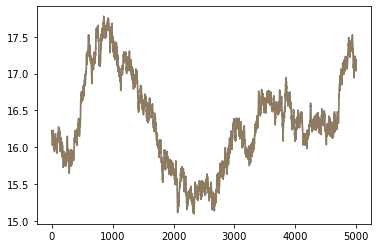

In [58]:
plt.plot(rg_val)
plt.plot(np.sqrt(rg),alpha=0.5)